In [1]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 18 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

In [3]:
from queue import PriorityQueue

In [4]:
vertex = {
'S': ['A', 'D'],
'A': ['S', 'D', 'B'],
'B': ['A', 'C', 'E'],
'C': ['B'],
'D': ['S', 'A', 'E'],
'E': ['D', 'B', 'F'],
'F': ['E', 'G'],
'G': ['F']
}

In [5]:
weight = {
'SA': 6,
'SD': 3,
'AS': 6,
'AD': 5,
'AB': 5,
'BA': 5,
'BC': 4,
'BE': 5,
'CB': 4,
'DS': 3,
'DA': 5,
'DE': 2,
'ED': 2,
'EB': 5,
'EF': 4,
'FE': 4,
'FG': 3,
'GF': 3
}


In [6]:
heuristic = {
'S': 12,
'A': 8,
'D': 9,
'B': 7,
'C': 5,
'E': 4,
'F': 2,
'G': 0
}

In [16]:
def main():
    # Creating network graph
    G = nx.Graph()

    # Add nodes with heuristic values
    for node, h_value in heuristic.items():
        G.add_node(node, heuristic=h_value)

    # Add edges with weights
    for edge, w_value in weight.items():
        node1, node2 = edge[0], edge[1]  # Extract nodes from edge name
        G.add_edge(node1, node2, weight=w_value)

    # Define layout for visualization
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

    # Visualize the graph
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='red', font_size=10,
            font_color='yellow', font_weight='bold', edge_color='crimson')

    # Add labels for the heuristic values on the nodes
    labels = nx.get_node_attributes(G, 'heuristic')
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color='blue')

    # Add labels for the weightage on the edge
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='purple')

    plt.show()

In [35]:
def a_star(graph, start, goal):
    """ Implements the A* algorithm. """
    queue = PriorityQueue()
    queue.put((0, start))
    visited = {start: None}
    cost_so_far = {start: 0}

    while not queue.empty():
        current_priority, current = queue.get()

        if current == goal:
            break

        for neighbor in graph[current]:
            edge_weight = weight.get(current + neighbor, weight.get(neighbor + current, float('inf')))
            new_cost = cost_so_far[current] + edge_weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                queue.put((priority, neighbor))
                visited[neighbor] = current

    return visited, cost_so_far.get(goal, float('inf'))



In [36]:
def reconstruct_path(visited, start, goal):
    """ Reconstructs the path from start to goal. """
    path = []
    current = goal

    while current and current != start:
        path.append(current)
        current = visited.get(current)

    if current == start:
        path.append(start)
        path.reverse()
        return path
    else:
        return None


In [41]:
 visited, cost = a_star(vertex, 'S', 'G')
 path = reconstruct_path(visited, 'S', 'G')

 if path:
  print(f"Path for A* is: {path} with a cost of {cost}")
 else:
  print("No valid path found.")



Path for A* is: ['S', 'D', 'E', 'F', 'G'] with a cost of 12


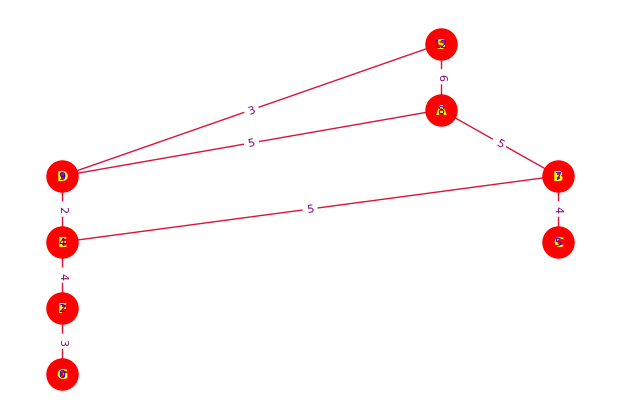

In [17]:
main()